# Youtube channel analysis for the channel "VIT BHOPAL Official"

### using YouTube Data API v3

In [67]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

from dotenv import load_dotenv
import os


current_dir = os.getcwd()

# Specify the path to the .env file outside the folder
env_file_path = os.path.join(current_dir, '..', '.env')


# Load environment variables from .env file
load_dotenv(env_file_path)
api_key = os.getenv("API_KEY")


In [68]:
api=api_key
# channel_id="UCFJ1o0OgutcUvG3lOm70v_w" #-- VIT Bhopal Official
VIT_channels=['UCdqk7wzTloAVBY_j4p4weAg',  # Riviera - VIT University
              'UCFJ1o0OgutcUvG3lOm70v_w',  # VIT Bhopal Official
              'UC13TAqsAqIkfOUfawdJOffA',  # VIT AP
              'UCF2JKnGSPpZk60-ls4BtWRA',  # VIT Chennai
              'UCA9pirjKrKlg2bCvPKRDkyg',  # Vellore Institute of Technology
              'UCvobcKpQX1cL4PJnVllPnmg',  # VITrendZ Chennai
              'UCrRBXKMWBhAHF31J4QkPWCw',  # Placement VIT Bhopal
              'UC9JuWZdup3Lkh05KObjtptw'   # Insights Club | VIT Bhopal
             ]
api_service='youtube'
api_version='v3'

yt= build(api_service, api_version, developerKey=api)

## Setting up the platform to get channel statistics

In [69]:
def get_channel_stats(yt, VIT_channels):
    
    all_stats=[]
    request=yt.channels().list(
                part='snippet,contentDetails,statistics',
                id=','.join(VIT_channels))  #list into a single string
    response=request.execute()
    
    for i in range(len(response['items'])): # iterating 8 times for all nine channels
        stats=dict(Channel_name=response['items'][i]['snippet']['title'],
                   Subscribers=response['items'][i]['statistics']['subscriberCount'],
                   Views =response['items'][i]['statistics']['viewCount'],
                   Videos=response['items'][i]['statistics']['videoCount'],
                   Id_playlist=response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_stats.append(stats) # appending responses to all_stats
    return all_stats 

In [70]:
stats_channel=get_channel_stats(yt, VIT_channels)

In [71]:
# visualizing it into a table
data_channel=pd.DataFrame(stats_channel)
data_channel

,Channel_name,Subscribers,Views,Videos,Id_playlist
0,Placement VIT Bhopal,3720,50707,72,UUrRBXKMWBhAHF31J4QkPWCw
1,Insights Club | VIT Bhopal,339,41366,39,UU9JuWZdup3Lkh05KObjtptw
2,VIT BHOPAL Official,7390,1267160,273,UUFJ1o0OgutcUvG3lOm70v_w
3,VITrendZ Chennai,1640,95782,48,UUvobcKpQX1cL4PJnVllPnmg
4,Riviera - VIT University,7530,1515894,41,UUdqk7wzTloAVBY_j4p4weAg
5,VIT AP,9320,3565787,360,UU13TAqsAqIkfOUfawdJOffA
6,Vellore Institute of Technology,60300,15392160,640,UUA9pirjKrKlg2bCvPKRDkyg
7,VIT Chennai,9470,932846,101,UUF2JKnGSPpZk60-ls4BtWRA


In [72]:
#converting object data type to integers

data_channel['Subscribers']=pd.to_numeric(data_channel['Subscribers'])
data_channel['Views']=pd.to_numeric(data_channel['Views'])
data_channel['Videos']=pd.to_numeric(data_channel['Videos'])


data_channel.dtypes


Channel_name    object
Subscribers      int64
Views            int64
Videos           int64
Id_playlist     object
dtype: object

#### Bar plot using seaborn for subscribers


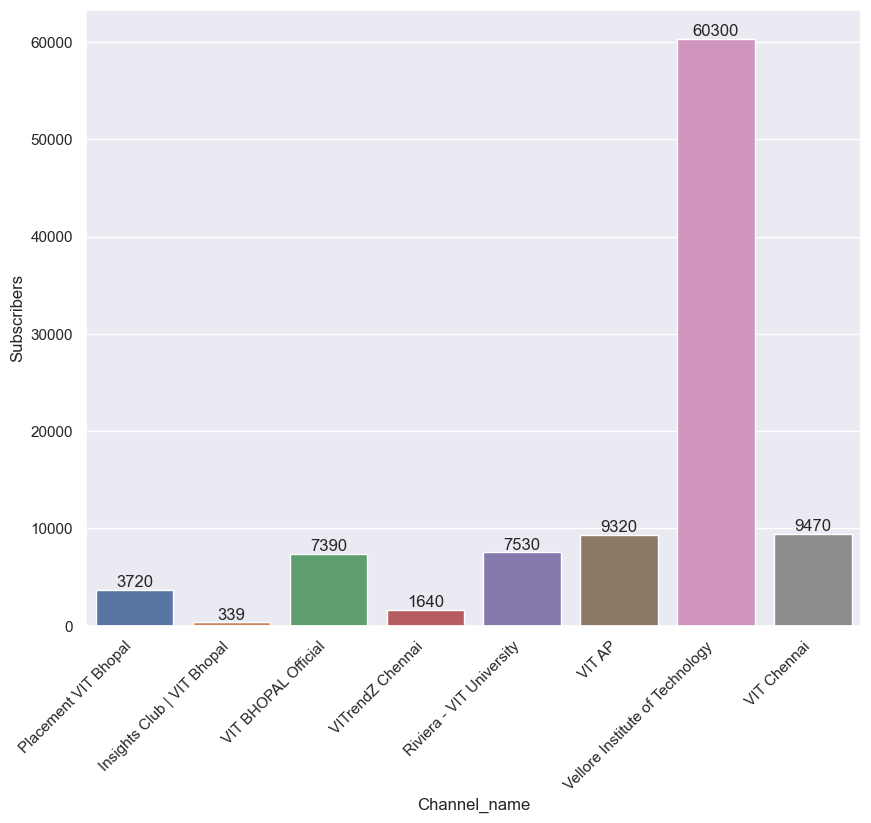

In [73]:
# bar plot using seaborn for subscribers

bar=sns.barplot(x='Channel_name', y='Subscribers', data=data_channel)
bar.set_xticklabels(bar.get_xticklabels(), rotation=45, horizontalalignment='right')


for index, value in enumerate(data_channel['Subscribers']):
    bar.text(index, value, str(value), ha='center', va='bottom')

#### Bar plot using seaborn for Views


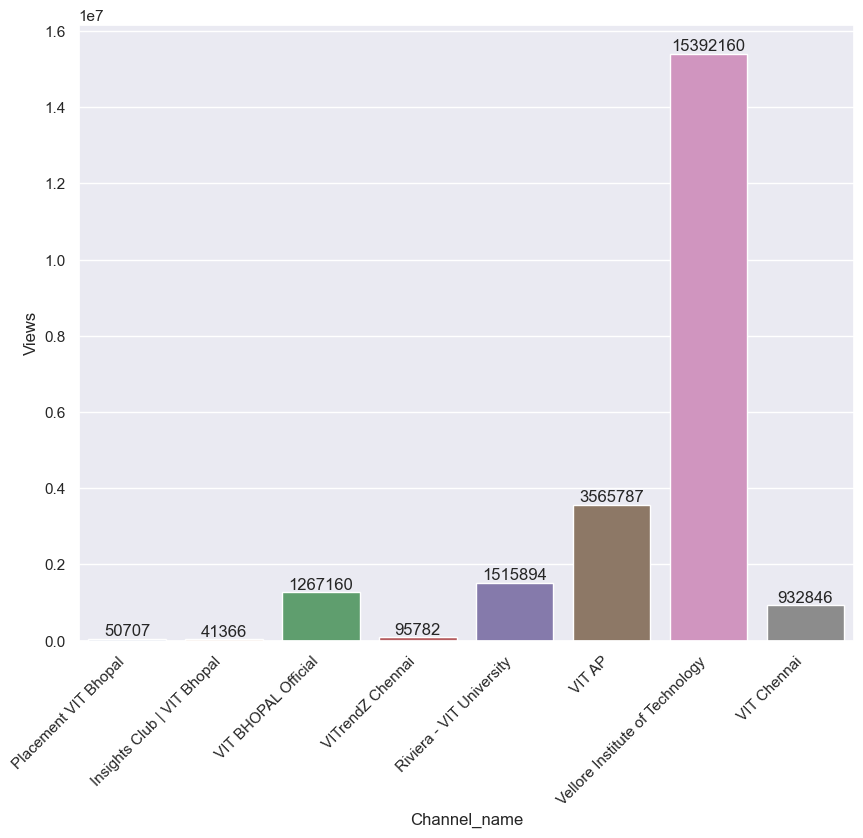

In [74]:
# bar plot using seaborn for Views


bar=sns.barplot(x='Channel_name', y='Views', data=data_channel)
bar.set_xticklabels(bar.get_xticklabels(), rotation=45, horizontalalignment='right')


for index, value in enumerate(data_channel['Views']):
    bar.text(index, value, str(value), ha='center', va='bottom')


#### Bar plot using seaborn for number of Videos


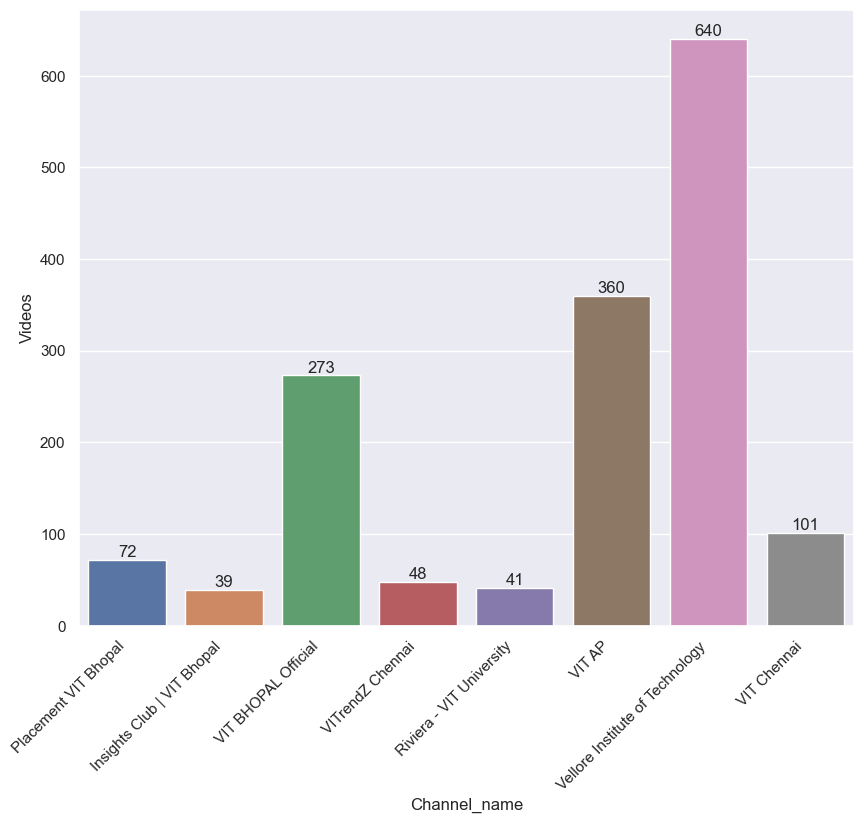

In [75]:
# bar plot using seaborn for Videos


bar=sns.barplot(x='Channel_name', y='Videos', data=data_channel)
bar.set_xticklabels(bar.get_xticklabels(), rotation=45, horizontalalignment='right')


for index, value in enumerate(data_channel['Videos']):
    bar.text(index, value, str(value), ha='center', va='bottom')

### Let's Explore the "VIT BHOPAL Official" Channel

In [76]:
data_channel


,Channel_name,Subscribers,Views,Videos,Id_playlist
0,Placement VIT Bhopal,3720,50707,72,UUrRBXKMWBhAHF31J4QkPWCw
1,Insights Club | VIT Bhopal,339,41366,39,UU9JuWZdup3Lkh05KObjtptw
2,VIT BHOPAL Official,7390,1267160,273,UUFJ1o0OgutcUvG3lOm70v_w
3,VITrendZ Chennai,1640,95782,48,UUvobcKpQX1cL4PJnVllPnmg
4,Riviera - VIT University,7530,1515894,41,UUdqk7wzTloAVBY_j4p4weAg
5,VIT AP,9320,3565787,360,UU13TAqsAqIkfOUfawdJOffA
6,Vellore Institute of Technology,60300,15392160,640,UUA9pirjKrKlg2bCvPKRDkyg
7,VIT Chennai,9470,932846,101,UUF2JKnGSPpZk60-ls4BtWRA


In [77]:
Id_playlist = data_channel.loc[data_channel['Channel_name'] == "VIT BHOPAL Official", 'Id_playlist'].iloc[0]
# assigning playlist id value of "VIT BHOPAL Official" to Id_playlist variable

In [78]:
# get ids for the channel

def get_videos_id(yt, Id_playlist):
    request=yt.playlistItems().list(
                part="contentDetails",
                playlistId=Id_playlist,
                maxResults=50)
    response=request.execute()
    
    video_ids=[]
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
    
    next_page_token=response.get('nextPageToken')
    more_pages=True
    
    # as we have limitation for 50 we will use while loop to get all videos untill we are not left with any videos
    
    while more_pages:
        if next_page_token is None:
            more_pages=False
        else:
            request=yt.playlistItems().list(
                            part='contentDetails',
                            playlistId=Id_playlist,
                            maxResults=50,
                            pageToken = next_page_token)
            response=request.execute()
            
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
                
            next_page_token=response.get('nextPageToken')
    
    
    
    
    
    
    return video_ids
    


In [79]:
video_ids=get_videos_id(yt, Id_playlist)

### Now let's Find out details about "VIT BHOPAL Official" Channel

In [80]:
def get_video_details(yt, video_ids):
    all_video_stats=[]
    # we will iterate the requests to get the data of all videos, as it is limited to 50 videos each time
    
    for i in range(0, len(video_ids), 50):
        request =yt.videos().list(
                part='snippet, statistics', 
                id=','.join(video_ids[i:i+50]))# each iteration it will take 50 data
        response=request.execute()
        
        for video in response['items']:
            video_stats=dict(Title=video['snippet']['title'],
                            Date_upload=video['snippet']['publishedAt'],
                            Views=video['statistics']['viewCount'],
                            Likes=video['statistics'].get('likeCount'),
                            
                            )# this channel disabled comments on their videos
            all_video_stats.append(video_stats)
    return all_video_stats

In [81]:
details_video=get_video_details(yt, video_ids)

In [82]:
# visualizing it into a table

data_video=pd.DataFrame(details_video)

In [83]:
data_video['Date_upload']=pd.to_datetime(data_video['Date_upload']).dt.date
data_video['Views']=pd.to_numeric(data_video['Views'])
data_video['Likes']=pd.to_numeric(data_video['Likes'])
data_video

,Title,Date_upload,Views,Likes
0,VIT | Bhopal | Features | Infrastructure | Aca...,2024-02-22,1143,27.0
1,VIT | Bhopal | Journey | Infrastructure | 2017...,2024-01-30,967,30.0
2,Unveiling adVITya 2024 - A sneak peek into a t...,2023-12-18,5434,175.0
3,"Celebrating Unity, Culture, and Young Talent a...",2023-10-13,478,9.0
4,"Celebrating Unity, Culture, and Young Talent |...",2023-10-13,446,4.0
...,...,...,...,...
270,STUDENTS SPEAK: EDUCATION AT VIT BHOPAL,2018-05-08,3238,27.0
271,All about VIT,2018-04-05,3833,21.0
272,VITAA BHOPAL CHAPTER,2018-03-08,1597,21.0
273,Biz Whiz Club conducted a Flash Mob,2018-03-05,1015,12.0


###### Q let's find top 10 videos

In [84]:
# lets find top 10 videos
top_videos=data_video.sort_values(by='Views', ascending=False).head(10)

top_videos

,Title,Date_upload,Views,Likes
44,Aerospace | Department | VIT | Bhopal | Centra...,2022-07-06,199247,79.0
120,M.Tech CSE (Specialization in Cyber Security )...,2021-07-16,173595,18.0
118,5 Years Integrated M.Tech CSE (Specialization...,2021-07-16,62566,23.0
257,VIT Bhopal University #VIT #VITBhopal,2019-04-15,50568,409.0
106,First | Engineering | Convocation | 2021 | Spe...,2021-10-27,50442,67.0
14,Future Ready | VIT | Bhopal | University | Int...,2023-05-02,47801,253.0
209,VIT Bhopal | Hostel | Gym | Swimming pool | Wo...,2020-08-12,43640,NaN
111,The Legacy of Placement Records Continues @ VI...,2021-07-31,41663,51.0
119,Integrated M.Tech Programme Artificial Intel...,2021-07-16,33618,11.0
116,BBA (Bachelor of Business Administration) | VI...,2021-07-16,33505,13.0


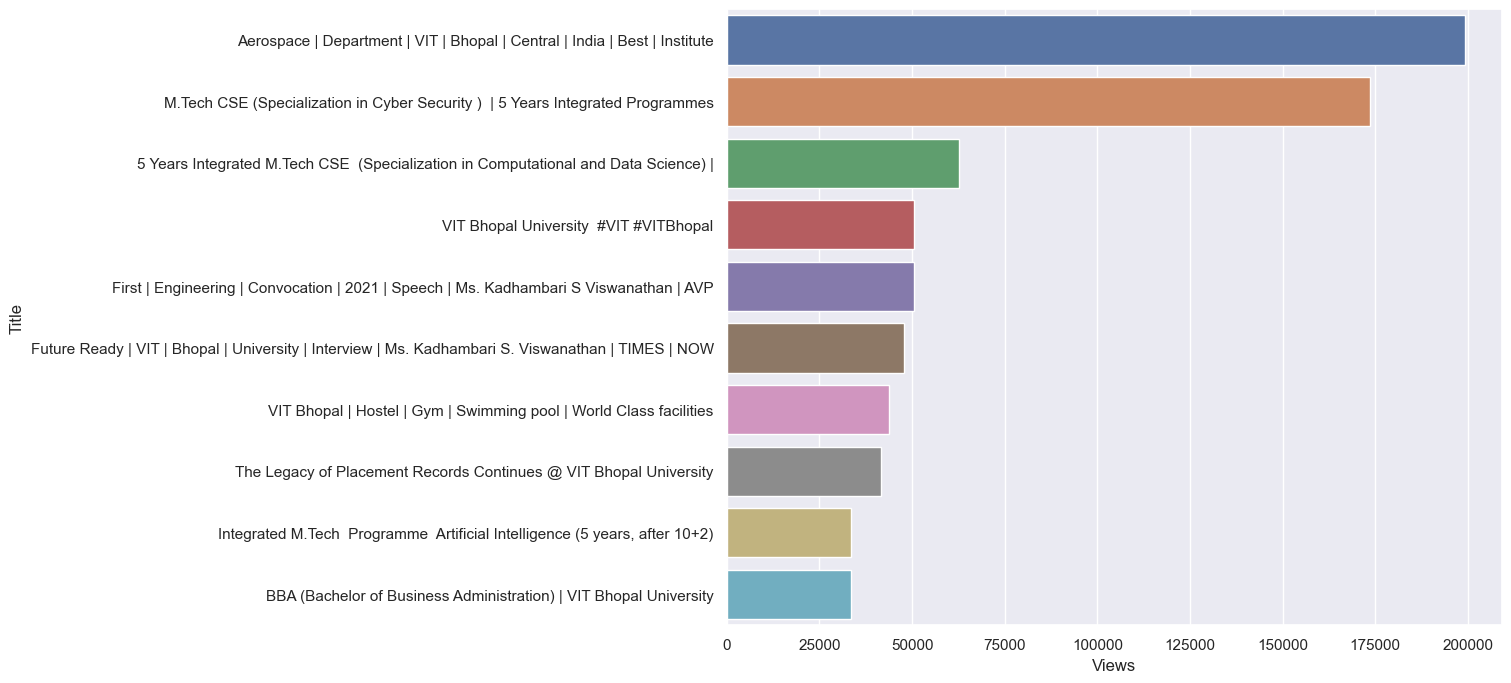

In [85]:
# bar plot for these top 10 watched videos

sns.set(rc={'figure.figsize': (10, 8)})

bar=sns.barplot(x='Views', y='Title', data=top_videos)



###### Q monthly statistics of video uploaded by "Vellore Institute of Technology"

In [86]:
# monthly statistics of video uploaded by "Vellore Institute of Technology"

data_video['Month']=pd.to_datetime(data_video['Date_upload']).dt.strftime('%b')

data_video

,Title,Date_upload,Views,Likes,Month
0,VIT | Bhopal | Features | Infrastructure | Aca...,2024-02-22,1143,27.0,Feb
1,VIT | Bhopal | Journey | Infrastructure | 2017...,2024-01-30,967,30.0,Jan
2,Unveiling adVITya 2024 - A sneak peek into a t...,2023-12-18,5434,175.0,Dec
3,"Celebrating Unity, Culture, and Young Talent a...",2023-10-13,478,9.0,Oct
4,"Celebrating Unity, Culture, and Young Talent |...",2023-10-13,446,4.0,Oct
...,...,...,...,...,...
270,STUDENTS SPEAK: EDUCATION AT VIT BHOPAL,2018-05-08,3238,27.0,May
271,All about VIT,2018-04-05,3833,21.0,Apr
272,VITAA BHOPAL CHAPTER,2018-03-08,1597,21.0,Mar
273,Biz Whiz Club conducted a Flash Mob,2018-03-05,1015,12.0,Mar


In [87]:
videos_per_month=data_video.groupby('Month', as_index=False).size()

videos_per_month

,Month,size
0,Apr,13
1,Aug,41
2,Dec,13
3,Feb,45
4,Jan,3
5,Jul,39
6,Jun,22
7,Mar,37
8,May,26
9,Nov,4


In [88]:
# now let's sort this months in ascending order in context to seriol no given

months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']


videos_per_month.index=pd.CategoricalIndex(videos_per_month['Month'], categories=months, ordered=True)


videos_per_month=videos_per_month.sort_index()

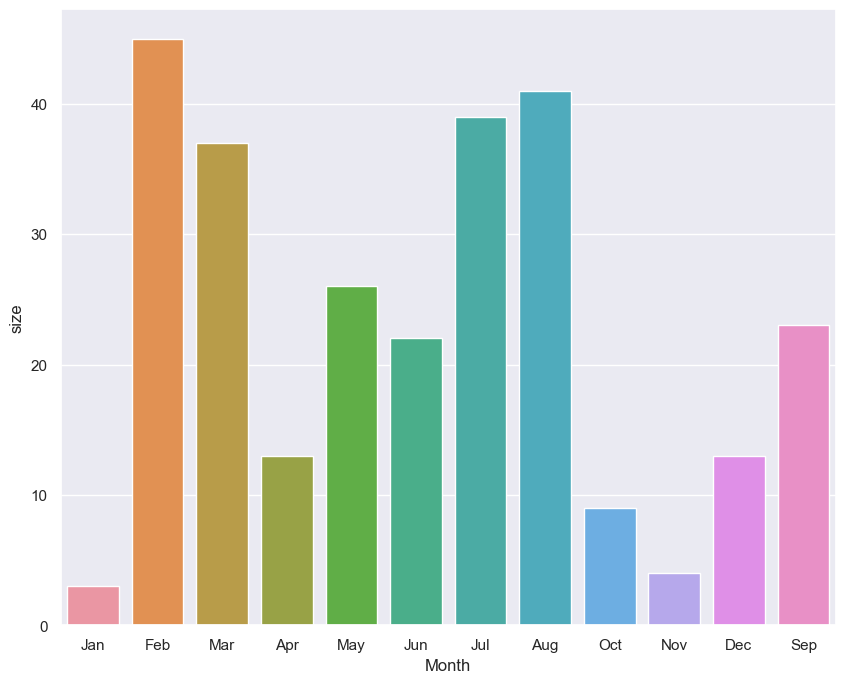

In [89]:
# videos posted each month 
sns.set(rc={'figure.figsize': (10, 8)})

bar= sns.barplot(x='Month', y='size', data=videos_per_month)

###### Q What is the average number of likes per video?

In [90]:
average_likes_per_video = data_video['Likes'].mean()
average_likes_per_video

65.16479400749064

###### Q What is the correlation between views and likes?


In [91]:
correlation_views_likes = data_video['Views'].corr(data_video['Likes'])
correlation_views_likes

0.10198209549509082

###### Q Which video has the highest number of views?


In [92]:
video_with_highest_views = data_video.loc[data_video['Views'].idxmax()]['Title']
video_with_highest_views

'Aerospace | Department | VIT | Bhopal | Central | India | Best | Institute'

###### Q How many videos have views greater than 1 lakh?


In [93]:
videos_above_threshold = data_video[data_video['Views'] > 100000]
videos_above_threshold

,Title,Date_upload,Views,Likes,Month
44,Aerospace | Department | VIT | Bhopal | Centra...,2022-07-06,199247,79.0,Jul
120,M.Tech CSE (Specialization in Cyber Security )...,2021-07-16,173595,18.0,Jul


###### Q What is the average number of views for videos with more than 100 likes?


In [94]:
average_views_for_high_likes = data_video[data_video['Likes'] > 100]['Views'].mean()
average_views_for_high_likes

7386.375

###### Q What is the trend in views over time (plot)?


<Axes: title={'center': 'Views Over Time'}, xlabel='Date_upload'>

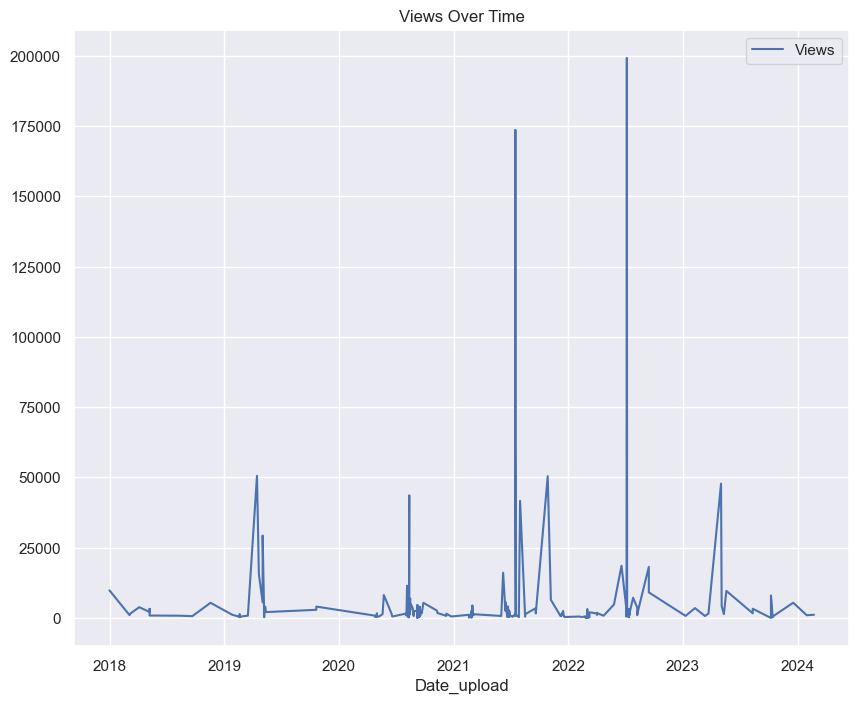

In [95]:
# What is the trend in views over time (plot)?
data_video.plot(x='Date_upload', y='Views', kind='line', title='Views Over Time')

###### Q What is the trend in likes over time (plot)?


<Axes: title={'center': 'Likes Over Time'}, xlabel='Date_upload'>

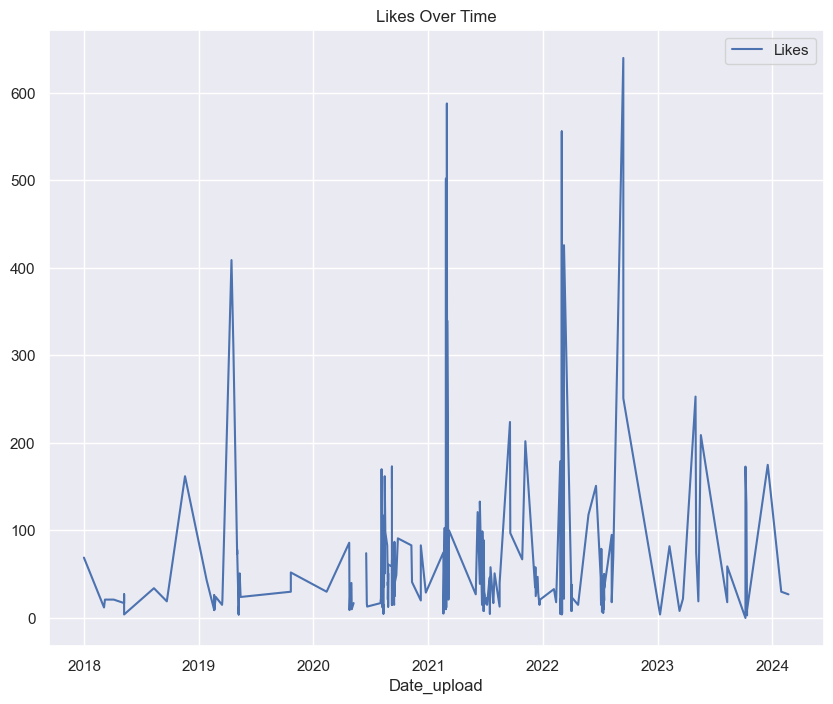

In [96]:
# What is the trend in likes over time (plot)?
data_video.plot(x='Date_upload', y='Likes', kind='line', title='Likes Over Time')

###### Q How many videos have zero likes?


In [97]:
videos_with_zero_likes = data_video[data_video['Likes'] == 0]
videos_with_zero_likes

,Title,Date_upload,Views,Likes,Month
8,4th ANNUAL CONVOCATION - VIT BHOPAL,2023-10-08,0,0.0,Oct


### Download the video data for this channel in .CSV form


In [98]:
# download the video data for this channel

data_video.to_csv('YT_Data_VIT BHOPAL Official.csv')

##### Made with ❤️ by Amar Kumar